Optimal Energy Group Indices: [131  18 252   2 108   1 175  16  10 238 105  81  61  60  70 191 152  50
  99 223 123 107 262  63 282 254  37   1   8 192 180 103 183 165 230  33
 281 299 147 189 153  34 259  18 175  25 277 185  98 159  54  38 157 259
 132 123  38 130 188 273  99 203 220 162  70  97 223  74 163 184  62 285
 209  18 192 114  10  54 163 283  86 260 114 298 233  96  54  65  91  94
 199  60  93 253 244 250  23 296 107 213 242 205 115  55 266 106 113  67
 192 264  66 225 292 154   5 140 109  11 273 221 278 263 237 268 132 270
 188 130  53  95  38 141  59 219 165 161  67   0 151 231 108 204 259 282
  45  34  17 123  98 214]
Optimal Signal Group Indices: [3, 4, 6, 7, 9, 12, 13, 14, 15, 19, 20, 21, 22, 24, 26, 27, 28, 29, 30, 31, 32, 35, 36, 39, 40, 41, 42, 43, 44, 46, 47, 48, 49, 51, 52, 56, 57, 58, 64, 68, 69, 71, 72, 73, 75, 76, 77, 78, 79, 80, 82, 83, 84, 85, 87, 88, 89, 90, 92, 100, 101, 102, 104, 110, 111, 112, 116, 117, 118, 119, 120, 121, 122, 124, 125, 126, 127, 128, 129

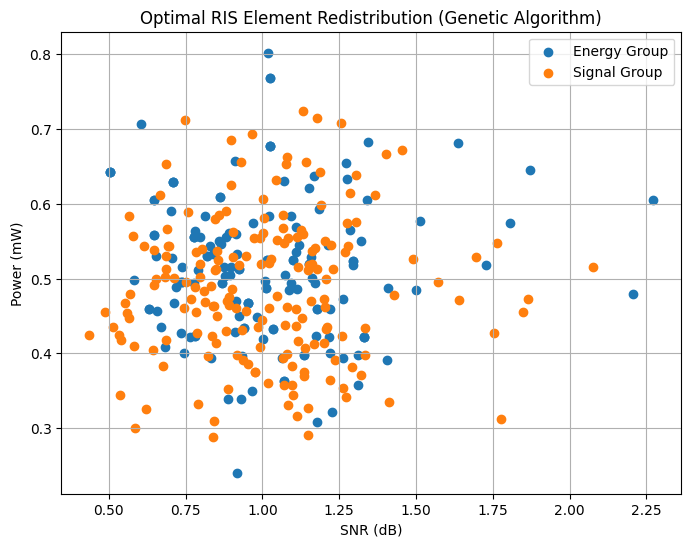

In [41]:
import numpy as np
import matplotlib.pyplot as plt

# Generate simulated data for RIS elements' characteristics (channel conditions, energy levels, signal reception)
num_elements = 300

elements = np.random.normal(0.5, 0.1, (num_elements, 4))

# Define channel gain and Rayleigh fading parameters
path_loss_exponent = 2.0
noise_power = 0.01

# Genetic Algorithm for optimal redistribution using random initialization
population_size = 100
num_generations = 100
crossover_rate = 0.8
mutation_rate = 0.1

best_snr = float('inf')
best_power = float('inf')
best_energy_indices = None
best_signal_indices = None

def calculate_snr_power(energy_indices, signal_indices):
    energy_power = np.sum(elements[energy_indices, 1])  # Total energy power
    signal_power = np.sum(elements[signal_indices, 1])  # Total signal power

    energy_distance = np.sum(elements[energy_indices, 2])  # Sum of distances for energy elements
    signal_distance = np.sum(elements[signal_indices, 2])  # Sum of distances for signal elements

    # Calculate SNR considering Friis free space model
    snr = (signal_power / signal_distance**2) / (energy_power / energy_distance**2)

    # Introduce Rayleigh fading effect
    snr *= np.random.rayleigh()

    power = energy_power + signal_power  # Total power
    return snr, power



def evaluate_fitness(energy_indices, signal_indices):
    snr, power = calculate_snr_power(energy_indices, signal_indices)
    return 1 / (snr * power)  # Minimize the reciprocal of SNR * power

def genetic_algorithm():
    population = [np.random.choice(range(num_elements), num_elements // 2, replace=False) for _ in range(population_size)]
    
    for _ in range(num_generations):
        new_population = []
        for parent1, parent2 in zip(population[::2], population[1::2]):
            if np.random.rand() < crossover_rate:
                crossover_point = np.random.randint(1, num_elements // 2)
                child1 = np.concatenate((parent1[:crossover_point], parent2[crossover_point:]))
                child2 = np.concatenate((parent2[:crossover_point], parent1[crossover_point:]))
            else:
                child1 = parent1
                child2 = parent2
            
            for child in [child1, child2]:
                if np.random.rand() < mutation_rate:
                    mutation_index = np.random.randint(num_elements // 2)  # Ensure the mutated index is within bounds
                    child[mutation_index] = np.random.randint(num_elements)        
            new_population.extend([child1, child2])
        
        population = new_population
        population.sort(key=lambda ind: evaluate_fitness(ind, list(set(range(num_elements)) - set(ind))))
        # population = population[:population_size]

        
        best_individual = population[0]
        best_energy_indices = best_individual
        best_signal_indices = list(set(range(num_elements)) - set(best_individual))
        best_snr, best_power = calculate_snr_power(best_energy_indices, best_signal_indices)
        
    return best_energy_indices, best_signal_indices, best_snr, best_power

# Run the Genetic Algorithm
best_energy_indices, best_signal_indices, best_snr, best_power = genetic_algorithm()

# Calculate initial SNR and power
initial_snr, initial_power = calculate_snr_power(range(num_elements // 2), range(num_elements // 2, num_elements))

# Calculate efficiency metrics
snr_improvement_percentage = (abs(best_snr - initial_snr) / initial_snr) * 100
power_reduction_percentage = (abs(initial_power - best_power) / initial_power) * 100
energy_efficiency = (best_snr * best_power) / num_elements
combined_improvement_metric = ((snr_improvement_percentage * power_reduction_percentage) ** 0.5)

# Print optimal groupings and their characteristics
print("Optimal Energy Group Indices:", best_energy_indices)
print("Optimal Signal Group Indices:", best_signal_indices)
print("Initial SNR:", initial_snr, "dB")
print("Initial Power:", initial_power, "mW")
print("Optimal SNR:", best_snr, "dB")
print("Optimal Power:", best_power, "mW")
print("SNR Improvement Percentage:", snr_improvement_percentage, "%")
print("Power Reduction Percentage:", power_reduction_percentage, "%")
print("Energy Efficiency:", energy_efficiency, "SNR * Power / Num Elements")
print("Combined Improvement Metric:", combined_improvement_metric)

# Visualize the efficiency
plt.figure(figsize=(8, 6))
plt.scatter(elements[best_energy_indices, 0] / elements[best_energy_indices, 2], elements[best_energy_indices, 1], label='Energy Group')
plt.scatter(elements[best_signal_indices, 0] / elements[best_signal_indices, 2], elements[best_signal_indices, 1], label='Signal Group')
plt.xlabel('SNR (dB)')
plt.ylabel('Power (mW)')
plt.title('Optimal RIS Element Redistribution (Genetic Algorithm)')
plt.legend()
plt.grid(True)
plt.show()



+ smart optimization

Optimal Energy Group Indices: [43, 109, 55, 127, 193, 52, 46, 123, 17, 22, 38, 2, 269, 54, 177, 75, 224, 262, 86, 176, 23, 6, 250, 48, 72, 171, 293, 128, 230, 121, 122, 70, 6, 214, 163, 252, 163, 200, 82, 157, 175, 185, 260, 274, 273, 218, 128, 29, 57, 47, 238, 109, 66, 67, 206, 100, 236, 80, 25, 192, 267, 149, 18, 16, 106, 191, 286, 283, 194, 129, 260, 258, 277, 266, 289, 94, 264, 83, 249, 64, 187, 31, 37, 216, 161, 190, 0, 27, 16, 88, 279, 143, 7, 275, 59, 244, 139, 98, 225, 93, 41, 30, 122, 246, 189, 78, 93, 42, 226, 139, 292, 215, 52, 42, 94, 24, 247, 75, 15, 233, 192, 36, 10, 81, 256, 152, 146, 204, 297, 35, 256, 188, 17, 276, 294, 33, 265, 74, 285, 275, 296, 131, 151, 157, 227, 177, 115, 138, 282, 202]
Optimal Signal Group Indices: [1, 3, 4, 5, 8, 9, 11, 12, 13, 14, 19, 20, 21, 26, 28, 32, 34, 39, 40, 44, 45, 49, 50, 51, 53, 56, 58, 60, 61, 62, 63, 65, 68, 69, 71, 73, 76, 77, 79, 84, 85, 87, 89, 90, 91, 92, 95, 96, 97, 99, 101, 102, 103, 104, 105, 107, 108, 110, 111, 112, 113, 11

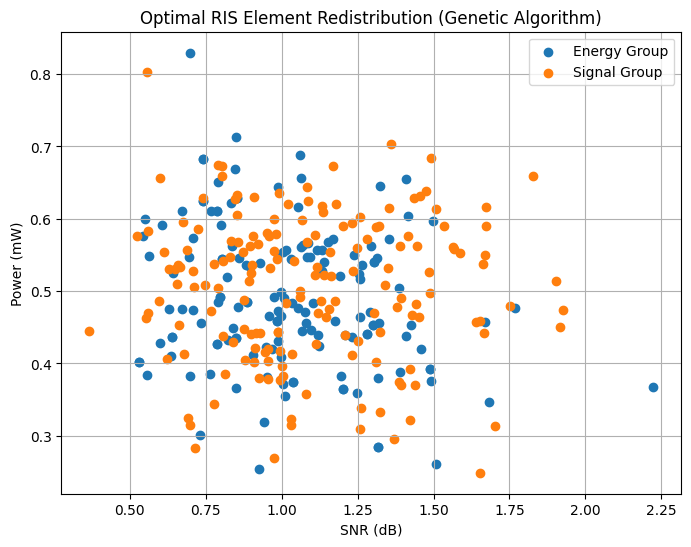

In [49]:
import numpy as np
import itertools
import matplotlib.pyplot as plt

# Generate simulated data for RIS elements' characteristics (channel conditions, energy levels, signal reception)
num_elements = 300
elements = np.random.normal(0.5, 0.1, (num_elements, 4))

# Define channel gain and Rayleigh fading parameters
noise_power = 0.01

# Genetic Algorithm parameters
population_size = 100
num_generations = 100
crossover_rate = 0.8
mutation_rate = 0.1

# Define the distance between the end user and the access point
user_distance = 100  # Example distance in meters

# Calculate the initial SNR for the end user without RIS-UAV system
initial_snr_without_ris = 1 / (user_distance ** 2)

def calculate_snr_power(energy_indices, signal_indices):
    energy_power = np.sum(elements[energy_indices, 1])
    signal_power = np.sum(elements[signal_indices, 1])
    energy_distance = np.sum(elements[energy_indices, 2])
    signal_distance = np.sum(elements[signal_indices, 2])
    
    snr = (signal_power / (signal_distance ** 2 + 1e-10)) / (energy_power / (energy_distance ** 2 + 1e-10))
    snr *= np.random.rayleigh()
    
    power = energy_power + signal_power
    return snr, power

def evaluate_fitness(energy_indices, signal_indices):
    snr, power = calculate_snr_power(energy_indices, signal_indices)
    return 1 / (snr * power)

def genetic_algorithm():
    population = [np.random.choice(range(num_elements), num_elements // 2, replace=False) for _ in range(population_size)]
    
    for _ in range(num_generations):
        new_population = []
        for parent1, parent2 in zip(population[::2], population[1::2]):
            if np.random.rand() < crossover_rate:
                crossover_point = np.random.randint(1, num_elements // 2)
                child1 = np.concatenate((parent1[:crossover_point], parent2[crossover_point:]))
                child2 = np.concatenate((parent2[:crossover_point], parent1[crossover_point:]))
            else:
                child1 = parent1
                child2 = parent2
            
            for child in [child1, child2]:
                if np.random.rand() < mutation_rate:
                    mutation_index = np.random.randint(num_elements // 2)
                    child[mutation_index] = np.random.randint(num_elements)
            new_population.extend([child1, child2])
        
        population = new_population
        
        best_individual = min(population, key=lambda ind: evaluate_fitness(ind, list(set(range(num_elements)) - set(ind))))
        
        best_energy_indices = best_individual
        best_signal_indices = list(set(range(num_elements)) - set(best_individual))
        best_snr, best_power = calculate_snr_power(best_energy_indices, best_signal_indices)
        
    return best_energy_indices, best_signal_indices, best_snr, best_power

def smarter_optimization(energy_indices, signal_indices):
    initial_snr, initial_power = calculate_snr_power(energy_indices, signal_indices)
    best_energy_indices = energy_indices.copy()
    best_signal_indices = signal_indices.copy()
    best_combined_improvement = 0
    
    for _ in range(100):  # Perform 10 iterations
        improved = False
        for energy_index in energy_indices:
            for signal_index in signal_indices:
                new_energy_indices = [idx for idx in energy_indices if idx != energy_index]
                new_signal_indices = [idx for idx in signal_indices if idx != signal_index]
                new_energy_indices.append(signal_index)
                new_signal_indices.append(energy_index)
                
                new_snr, new_power = calculate_snr_power(new_energy_indices, new_signal_indices)
                snr_improvement = new_snr - initial_snr
                power_reduction = initial_power - new_power
                combined_improvement_metric = snr_improvement - 0.5 * power_reduction
                
                if combined_improvement_metric > best_combined_improvement:
                    best_combined_improvement = combined_improvement_metric
                    best_energy_indices = new_energy_indices
                    best_signal_indices = new_signal_indices
                    improved = True
        
        if not improved:
            break
    
    return best_energy_indices, best_signal_indices, best_combined_improvement

# Run the Genetic Algorithm
best_energy_indices, best_signal_indices, best_snr, best_power = genetic_algorithm()

# Apply the smarter optimization strategy
best_energy_indices, best_signal_indices, combined_improvement_metric = smarter_optimization(best_energy_indices, best_signal_indices)

# Calculate initial SNR and power
initial_snr, initial_power = calculate_snr_power(range(num_elements // 2), range(num_elements // 2, num_elements))

# Calculate the improved SNR with RIS-UAV system
improved_snr_with_ris = 1 / (user_distance ** 2 * best_snr)

# Calculate initial SNR in dB and improved SNR in dB
initial_snr_dB = 10 * np.log10(initial_snr_without_ris)
improved_snr_dB = 10 * np.log10(improved_snr_with_ris)

# Calculate efficiency metrics
snr_improvement_percentage = (abs(improved_snr_dB - initial_snr_dB) / initial_snr_dB) * 100

# snr_improvement_percentage = (abs(best_snr - initial_snr) / initial_snr) * 100
power_reduction_percentage = (abs(initial_power - best_power) / initial_power) * 100
energy_efficiency = (best_snr * best_power) / num_elements

# Print optimal groupings and their characteristics
print("Optimal Energy Group Indices:", best_energy_indices)
print("Optimal Signal Group Indices:", best_signal_indices)
print("Initial SNR:", initial_snr, "dB")
print("Initial Power:", initial_power, "mW")
print("Optimal SNR:", best_snr, "dB")
print("Optimal Power:", best_power, "mW")
print("SNR Improvement Percentage:", snr_improvement_percentage, "%")
print("Power Reduction Percentage:", power_reduction_percentage, "%")
print("Energy Efficiency:", energy_efficiency, "SNR * Power / Num Elements")
print("Combined Improvement Metric:", combined_improvement_metric)

# Visualize the efficiency
plt.figure(figsize=(8, 6))
plt.scatter(elements[best_energy_indices, 0] / elements[best_energy_indices, 2], elements[best_energy_indices, 1], label='Energy Group')
plt.scatter(elements[best_signal_indices, 0] / elements[best_signal_indices, 2], elements[best_signal_indices, 1], label='Signal Group')
plt.xlabel('SNR (dB)')
plt.ylabel('Power (mW)')
plt.title('Optimal RIS Element Redistribution (Genetic Algorithm)')
plt.legend()
plt.grid(True)
plt.show()


Best Path Option: A*


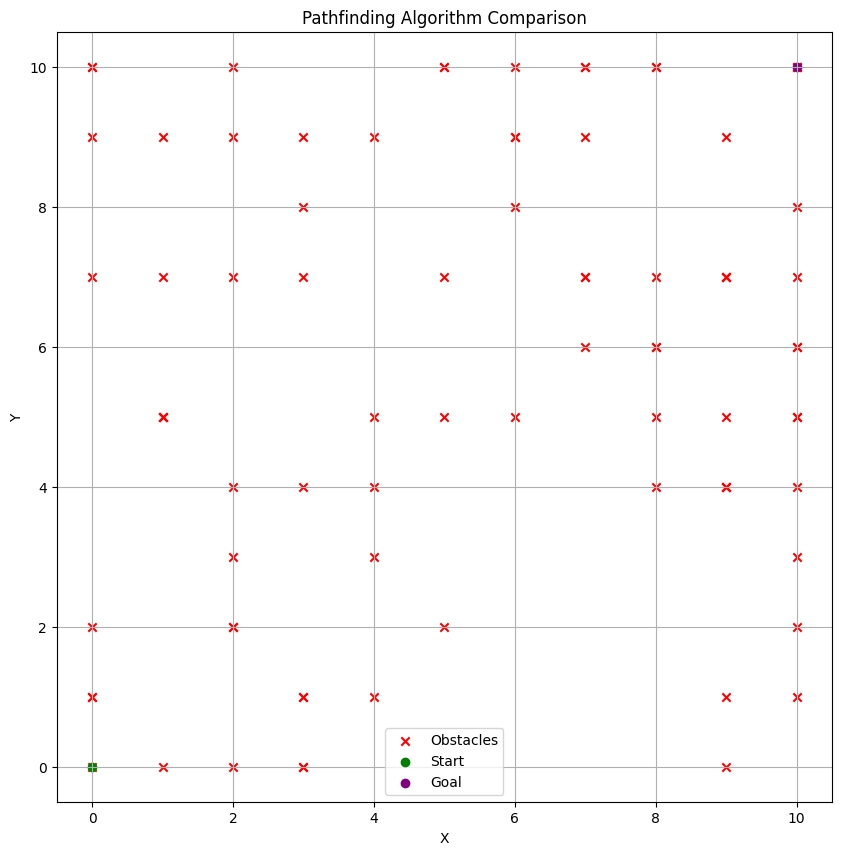

In [43]:
import numpy as np
import matplotlib.pyplot as plt
from heapq import heappop, heappush

# Define the grid environment
grid_size = 11
num_obstacles = 80
obstacles = [(np.random.randint(0, grid_size), np.random.randint(0, grid_size)) for _ in range(num_obstacles)]
start = (0, 0)
goal = (grid_size - 1, grid_size - 1)

# A* pathfinding with diagonal movements
def heuristic(a, b):
    return abs(a[0] - b[0]) + abs(a[1] - b[1])

def astar(start, goal, max_iterations=30000):
    open_list = [(0, start)]
    came_from = {}
    g_score = {start: 0}
    iterations = 0

    while open_list and iterations < max_iterations:
        current_g, current = heappop(open_list)
        if current == goal:
            path = [goal]
            while current in came_from:
                current = came_from[current]
                path.append(current)
            path.reverse()
            return path

        for dx, dy in [(0, 1), (0, -1), (1, 0), (-1, 0), (1, 1), (-1, -1), (1, -1), (-1, 1)]:
            neighbor = (current[0] + dx, current[1] + dy)
            if 0 <= neighbor[0] < grid_size and 0 <= neighbor[1] < grid_size and neighbor not in obstacles:
                tentative_g = g_score[current] + np.sqrt(dx ** 2 + dy ** 2)
                if tentative_g < g_score.get(neighbor, float('inf')):
                    came_from[neighbor] = current
                    g_score[neighbor] = tentative_g
                    f_score = tentative_g + heuristic(neighbor, goal)
                    heappush(open_list, (f_score, neighbor))

        iterations += 1

    return None

def d_star_lite(start, goal):
    open_list = [(0, goal)]
    came_from = {}
    g_score = {goal: 0}

    while open_list:
        current_g, current = heappop(open_list)
        if current == start:
            path = [start]
            while current in came_from:
                current = came_from[current]
                path.append(current)
            path.reverse()
            return path

        for dx, dy in [(0, 1), (0, -1), (1, 0), (-1, 0), (1, 1), (-1, -1), (1, -1), (-1, 1)]:
            neighbor = (current[0] + dx, current[1] + dy)
            if 0 <= neighbor[0] < grid_size and 0 <= neighbor[1] < grid_size and neighbor not in obstacles:
                tentative_g = g_score[current] + np.sqrt(dx ** 2 + dy ** 2)
                if tentative_g < g_score.get(neighbor, float('inf')):
                    came_from[neighbor] = current
                    g_score[neighbor] = tentative_g
                    f_score = tentative_g + heuristic(neighbor, start)
                    heappush(open_list, (f_score, neighbor))

    return None

def bfs(start, goal):
    queue = [start]
    came_from = {}
    visited = set()

    while queue:
        current = queue.pop(0)
        visited.add(current)

        if current == goal:
            path = [goal]
            while current in came_from:
                current = came_from[current]
                path.append(current)
            path.reverse()
            return path

        for dx, dy in [(0, 1), (0, -1), (1, 0), (-1, 0), (1, 1), (-1, -1), (1, -1), (-1, 1)]:
            neighbor = (current[0] + dx, current[1] + dy)
            if 0 <= neighbor[0] < grid_size and 0 <= neighbor[1] < grid_size and neighbor not in obstacles and neighbor not in visited:
                queue.append(neighbor)
                came_from[neighbor] = current

    return None

def dijkstra(start, goal):
    open_list = [(0, start)]
    came_from = {}
    g_score = {start: 0}

    while open_list:
        current_g, current = heappop(open_list)
        if current == goal:
            path = [goal]
            while current in came_from:
                current = came_from[current]
                path.append(current)
            path.reverse()
            return path

        for dx, dy in [(0, 1), (0, -1), (1, 0), (-1, 0), (1, 1), (-1, -1), (1, -1), (-1, 1)]:
            neighbor = (current[0] + dx, current[1] + dy)
            if 0 <= neighbor[0] < grid_size and 0 <= neighbor[1] < grid_size and neighbor not in obstacles:
                tentative_g = g_score[current] + np.sqrt(dx ** 2 + dy ** 2)
                if tentative_g < g_score.get(neighbor, float('inf')):
                    came_from[neighbor] = current
                    g_score[neighbor] = tentative_g
                    f_score = tentative_g
                    heappush(open_list, (f_score, neighbor))

    return None

# Find optimal path using A* pathfinding
path_astar = astar(start, goal, max_iterations=50000)

# Find optimal path using D* Lite
path_d_star_lite = d_star_lite(start, goal)

# Find optimal path using Breadth-First Search
path_bfs = bfs(start, goal)

# Find optimal path using Dijkstra's algorithm
path_dijkstra = dijkstra(start, goal)

# Calculate path lengths
path_lengths = {
    "A*": len(path_astar) if path_astar is not None else float('inf'),
    "D* Lite": len(path_d_star_lite) if path_d_star_lite is not None else float('inf'),
    "BFS": len(path_bfs) if path_bfs is not None else float('inf'),
    "Dijkstra's": len(path_dijkstra) if path_dijkstra is not None else float('inf')
}

# Store obstacle coordinates and optimal path coordinates
# optimal_path_coords = best_option  # Replace with the variable storing the optimal path coordinates
stored_obstacles = obstacles.copy()

# ... (rest of the code)

# Use the stored obstacle coordinates and optimal path coordinates in the third and fourth snippets
# Pass stored_obstacles and optimal_path_coords as inputs to the relevant functions

# Find the shortest path
best_option = min(path_lengths, key=path_lengths.get)

# Print the best option
print("Best Path Option:", best_option)

# Visualize the paths and obstacles
plt.figure(figsize=(10, 10))

# # A* path
# if path_astar is not None:
#     plt.subplot(2, 2, 1)
#     plt.plot([p[0] for p in path_astar], [p[1] for p in path_astar], marker='o', linestyle='-', color='blue', label='A* Path')
#     plt.scatter([o[0] for o in obstacles], [o[1] for o in obstacles], color='red', marker='x', label='Obstacles')
#     plt.scatter(start[0], start[1], color='green', marker='o', label='Start')
#     plt.scatter(goal[0], goal[1], color='purple', marker='o', label='Goal')
#     plt.xlabel('X')
#     plt.ylabel('Y')
#     plt.title('A* Pathfinding')
#     plt.legend()
#     plt.grid(True)
# else:
#     print("A* path not found.")

# # D* Lite path
# if path_d_star_lite is not None:
#     plt.subplot(2, 2, 2)
#     plt.plot([p[0] for p in path_d_star_lite], [p[1] for p in path_d_star_lite], marker='o', linestyle='-', color='green', label='D* Lite Path')
#     plt.scatter([o[0] for o in obstacles], [o[1] for o in obstacles], color='red', marker='x', label='Obstacles')
#     plt.scatter(start[0], start[1], color='green', marker='o', label='Start')
#     plt.scatter(goal[0], goal[1], color='purple', marker='o', label='Goal')
#     plt.xlabel('X')
#     plt.ylabel('Y')
#     plt.title('D* Lite Pathfinding')
#     plt.legend()
#     plt.grid(True)
# else:
#     print("D* Lite path not found.")

# # Breadth-First Search path
# if path_bfs is not None:
#     plt.subplot(2, 2, 3)
#     plt.plot([p[0] for p in path_bfs], [p[1] for p in path_bfs], marker='o', linestyle='-', color='orange', label='BFS Path')
#     plt.scatter([o[0] for o in obstacles], [o[1] for o in obstacles], color='red', marker='x', label='Obstacles')
#     plt.scatter(start[0], start[1], color='green', marker='o', label='Start')
#     plt.scatter(goal[0], goal[1], color='purple', marker='o', label='Goal')
#     plt.xlabel('X')
#     plt.ylabel('Y')
#     plt.title('Breadth-First Search Pathfinding')
#     plt.legend()
#     plt.grid(True)
# else:
#     print("BFS path not found.")

# # Dijkstra's path
# if path_dijkstra is not None:
#     plt.subplot(2, 2, 4)
#     plt.plot([p[0] for p in path_dijkstra], [p[1] for p in path_dijkstra], marker='o', linestyle='-', color='red', label="Dijkstra's Path")
#     plt.scatter([o[0] for o in obstacles], [o[1] for o in obstacles], color='red', marker='x', label='Obstacles')
#     plt.scatter(start[0], start[1], color='green', marker='o', label='Start')
#     plt.scatter(goal[0], goal[1], color='purple', marker='o', label='Goal')
#     plt.xlabel('X')
#     plt.ylabel('Y')
#     plt.title("Dijkstra's Algorithm")
#     plt.legend()
#     plt.grid(True)
# else:
#     print("Dijkstra's path not found.")

# plt.tight_layout()
# plt.show()
# Plotting obstacles
plt.scatter([o[0] for o in obstacles], [o[1] for o in obstacles], color='red', marker='x', label='Obstacles')

# Plot all paths
if path_astar is not None:
    plt.plot([p[0] for p in path_astar], [p[1] for p in path_astar], marker='o', linestyle='-', color='blue', label='A* Path')

if path_d_star_lite is not None:
    plt.plot([p[0] for p in path_d_star_lite], [p[1] for p in path_d_star_lite], marker='o', linestyle='-', color='green', label='D* Lite Path')

if path_bfs is not None:
    plt.plot([p[0] for p in path_bfs], [p[1] for p in path_bfs], marker='o', linestyle='-', color='orange', label='BFS Path')

if path_dijkstra is not None:
    plt.plot([p[0] for p in path_dijkstra], [p[1] for p in path_dijkstra], marker='o', linestyle='-', color='red', label="Dijkstra's Path")

plt.scatter(start[0], start[1], color='green', marker='o', label='Start')
plt.scatter(goal[0], goal[1], color='purple', marker='o', label='Goal')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Pathfinding Algorithm Comparison')
plt.legend()
plt.grid(True)
plt.show()

working RIS opti(genetic algo) with path finding

In [45]:
# import numpy as np
# import matplotlib.pyplot as plt
# from heapq import heappop, heappush

# # Define the grid environment
# grid_size = 11
# num_obstacles = 35
# obstacles = [(np.random.randint(0, grid_size), np.random.randint(0, grid_size)) for _ in range(num_obstacles)]
# start = (0, 0)
# goal = (grid_size - 1, grid_size - 1)

# # Generate simulated data for RIS elements' characteristics (channel conditions, energy levels, signal reception)
# num_elements = 100
# elements = np.random.normal(0.5, 0.1, (num_elements, 4))

# # Genetic Algorithm for optimal redistribution of RIS elements
# def genetic_algorithm(population_size=1000, num_generations=1000, mutation_rate=0.2):
#     population = [np.random.choice(range(num_elements), num_elements // 2, replace=False) for _ in range(population_size)]
    
#     for _ in range(num_generations):
#         new_population = []
        
#         for _ in range(population_size // 2):
#             parent1_idx = np.random.randint(population_size)
#             parent2_idx = np.random.randint(population_size)
#             parent1 = population[parent1_idx]
#             parent2 = population[parent2_idx]
            
#             crossover_point = np.random.randint(1, num_elements // 2)
#             child1 = np.concatenate((parent1[:crossover_point], parent2[crossover_point:]))
#             child2 = np.concatenate((parent2[:crossover_point], parent1[crossover_point:]))
            
#             if np.random.rand() < mutation_rate:
#                 mutation_index = np.random.randint(num_elements // 2)
#                 child1[mutation_index] = np.random.randint(num_elements)
            
#             if np.random.rand() < mutation_rate:
#                 mutation_index = np.random.randint(num_elements // 2)
#                 child2[mutation_index] = np.random.randint(num_elements)
            
#             new_population.extend([child1, child2])
        
#         population = new_population
    
#     best_energy_indices = population[np.argmin([calculate_metrics(None, None, indices)[0] for indices in population])]
#     best_signal_indices = np.array(list(set(range(num_elements)) - set(best_energy_indices)))
#     best_snr, best_power = calculate_metrics(None, None, best_energy_indices)
    
#     return best_energy_indices, best_signal_indices, best_snr, best_power


# # A* pathfinding with diagonal movements and RIS optimization
# def heuristic(a, b):
#     return abs(a[0] - b[0]) + abs(a[1] - b[1])

# # Calculate SNR and power based on element indices
# def calculate_snr_power(energy_indices, signal_indices):
#     energy_power = np.sum(elements[energy_indices, 1])  # Total energy power
#     signal_power = np.sum(elements[signal_indices, 1])  # Total signal power

#     energy_distance = np.sum(elements[energy_indices, 2])  # Sum of distances for energy elements
#     signal_distance = np.sum(elements[signal_indices, 2])  # Sum of distances for signal elements

#     # Add epsilon to avoid division by zero and negative values
#     epsilon = 1e-10

#     # Calculate SNR considering Friis free space model
#     if energy_power < epsilon or energy_distance < epsilon:
#         snr = 0
#     else:
#         snr = (signal_power / (signal_distance**2 + epsilon)) / (energy_power / (energy_distance**2 + epsilon))

#     # Introduce Rayleigh fading effect
#     snr *= np.random.rayleigh()

#     power = energy_power + signal_power  # Total power
#     return snr, power


# def astar_with_ris(start, goal, max_iterations=30000):
#     open_list = [(0, start)]
#     came_from = {}
#     g_score = {start: 0}
#     iterations = 0

#     while open_list and iterations < max_iterations:
#         current_g, current = heappop(open_list)
#         if current == goal:
#             path = [goal]
#             while current in came_from:
#                 current = came_from[current]
#                 path.append(current)
#             path.reverse()
#             return path

#         for dx, dy in [(0, 1), (0, -1), (1, 0), (-1, 0), (1, 1), (-1, -1), (1, -1), (-1, 1)]:
#             neighbor = (current[0] + dx, current[1] + dy)
#             if 0 <= neighbor[0] < grid_size and 0 <= neighbor[1] < grid_size and neighbor not in stored_obstacles:  # Use the stored obstacles
#                 tentative_g = g_score[current] + np.sqrt(dx ** 2 + dy ** 2)
#                 if tentative_g < g_score.get(neighbor, float('inf')):
#                     came_from[neighbor] = current
#                     g_score[neighbor] = tentative_g
#                     snr_improvement, power_reduction = calculate_metrics(neighbor, goal, best_energy_indices)
#                     pathfinding_cost = heuristic(neighbor, goal)
#                     w_pathfinding = 0.25  # Weight for pathfinding cost
#                     w_snr_improvement = 0.4  # Weight for SNR improvement
#                     w_power_reduction = 0.35  # Weight for power reduction
#                     total_cost = w_pathfinding * pathfinding_cost + w_snr_improvement * snr_improvement + w_power_reduction * power_reduction
#                     heappush(open_list, (total_cost, neighbor))

#         iterations += 1

#     return None

# # Define the weights for optimization factors
# w_snr_improvement = 0.6
# w_power_reduction = 0.4

# # Optimize RIS distribution at a point
# def optimize_ris_distribution_at_point(point, current_energy_indices, current_signal_indices):
#     # Calculate the distance from the current point to the goal
#     distance_to_goal = np.sqrt((goal[0] - point[0]) ** 2 + (goal[1] - point[1]) ** 2)
    
#     # Determine the optimization factor based on distance to goal
#     optimization_factor = 1.0 - distance_to_goal / np.sqrt(grid_size ** 2 + grid_size ** 2)
    
#     # Define epsilon
#     epsilon = 1e-10
    
#     # Initialize arrays to keep track of indices to remove and add
#     indices_to_remove = []
#     indices_to_add = []
    
#     for idx in range(len(current_energy_indices)):
#         if np.random.rand() < optimization_factor:
#             indices_to_remove.append(idx)
#             indices_to_add.append(idx)
    
#     # Remove indices from updated_energy_indices
#     updated_energy_indices = np.delete(current_energy_indices, indices_to_remove)
    
#     # Add indices to updated_signal_indices
#     updated_signal_indices = np.append(current_signal_indices, current_energy_indices[indices_to_add])
    
#     # Calculate SNR and power based on the updated distribution
#     new_snr, new_power = calculate_snr_power(updated_energy_indices, updated_signal_indices)
#     old_snr, old_power = calculate_snr_power(current_energy_indices, current_signal_indices)
    
#     # Ensure both SNR improvement and power reduction are positive
#     snr_improvement = max(0, new_snr - old_snr)
#     power_reduction = max(0, old_power - new_power)
    
#     # Calculate energy efficiency
#     if power_reduction == 0:
#         energy_efficiency = 0
#     else:
#         energy_efficiency = snr_improvement / (power_reduction + epsilon)
    
#     # Calculate the combined improvement metric
#     combined_improvement_metric = w_snr_improvement * snr_improvement + w_power_reduction * power_reduction
    
#     return updated_energy_indices, updated_signal_indices, snr_improvement, power_reduction, energy_efficiency, combined_improvement_metric



# # Run the Genetic Algorithm
# best_energy_indices, best_signal_indices, best_snr, best_power = genetic_algorithm()

# # Find optimal path using A* pathfinding with RIS optimization
# path_with_ris = astar_with_ris(start, goal, max_iterations=50000)

# if path_with_ris is not None:
#     # Optimize RIS element distribution at every point along the path and calculate efficiencies
#     optimized_efficiency_metrics = []
#     current_energy_indices = best_energy_indices.copy()
#     current_signal_indices = best_signal_indices.copy()
    
#     for i, point in enumerate(path_with_ris):
#         current_energy_indices, current_signal_indices, snr_improvement, power_reduction, energy_efficiency, combined_improvement_metric = optimize_ris_distribution_at_point(point, current_energy_indices, current_signal_indices)
#         optimized_efficiency_metrics.append((i, point, snr_improvement, power_reduction, energy_efficiency, combined_improvement_metric))
    
#     # Visualize the efficiency metrics along the path
#     if optimized_efficiency_metrics:
#         plt.figure(figsize=(8, 6))
#         plt.plot([i for i, _, _, _, _, _ in optimized_efficiency_metrics], [combined_improvement_metric for _, _, _, _, _, combined_improvement_metric in optimized_efficiency_metrics], marker='o', linestyle='-', color='blue', label='Combined Improvement Metric')
#         plt.xlabel('Point along Path')
#         plt.ylabel('Combined Improvement Metric')
#         plt.title('Efficiency Metrics along Optimal Path with RIS Optimization')
#         plt.legend()
#         plt.grid(True)
#         plt.show()
    
#     # Visualize the original and optimized paths along with obstacles
#     plt.figure(figsize=(10, 10))
#     plt.plot([p[0] for p in path_with_ris], [p[1] for p in path_with_ris], marker='o', linestyle='-', color='blue', label='Optimized Path')
#     plt.scatter([o[0] for o in obstacles], [o[1] for o in obstacles], color='red', marker='x', label='Obstacles')
#     plt.scatter(start[0], start[1], color='green', marker='o', label='Start')
#     plt.scatter(goal[0], goal[1], color='purple', marker='o', label='Goal')
#     plt.xlabel('X')
#     plt.ylabel('Y')
#     plt.title('Optimal Path Planning with RIS Optimization using Genetic Algorithm')
#     plt.legend()
#     plt.grid(True)
#     plt.show()
# else:
#     print("Path not found.")



previous version
+++

Smarter Optimization Strategy: Instead of random removal and addition of RIS elements, you could implement a more sophisticated optimization strategy. For example, you could use gradient-based optimization techniques or heuristics to intelligently select RIS elements for removal and addition based on their impact on SNR improvement, power reduction, and energy efficiency.

Dynamic Optimization Parameters: Adjust the optimization parameters dynamically based on the point's characteristics or the path's progression. For instance, you could increase the optimization factor or mutation rate when the path is closer to obstacles or the goal to encourage more significant changes in RIS distribution.

Multi-Objective Optimization: Optimize for multiple objectives simultaneously, such as maximizing SNR improvement while minimizing power reduction. This can be achieved by assigning different weights to SNR improvement and power reduction, and then optimizing for a combination of these objectives.

Constraint Handling: Apply constraints on the optimization process to ensure that SNR improvement and power reduction are both positive. For example, you can prevent removing too many RIS elements, which could lead to power reduction dominating the efficiency metrics.

Iterative Refinement: Allow for multiple iterations of RIS optimization at each point along the path, gradually refining the RIS distribution to improve efficiency metrics.

In [46]:
import numpy as np
import matplotlib.pyplot as plt
from heapq import heappop, heappush

# Define the grid environment
grid_size = 11
num_obstacles = 50
obstacles = [(np.random.randint(0, grid_size), np.random.randint(0, grid_size)) for _ in range(num_obstacles)]
start = (0, 0)
goal = (grid_size - 1, grid_size - 1)

# Generate simulated data for RIS elements' characteristics (channel conditions, energy levels, signal reception)
num_elements = 100
elements = np.random.normal(0.5, 0.1, (num_elements, 4))


# Genetic Algorithm for optimal redistribution of RIS elements
def genetic_algorithm(population_size=100, num_generations=100, mutation_rate=0.1):
    population = [np.random.choice(range(num_elements), num_elements // 2, replace=False) for _ in range(population_size)]
    
    for _ in range(num_generations):
        new_population = []
        
        for _ in range(population_size // 2):
            parent1_idx = np.random.randint(population_size)
            parent2_idx = np.random.randint(population_size)
            parent1 = population[parent1_idx]
            parent2 = population[parent2_idx]
            
            crossover_point = np.random.randint(1, num_elements // 2)
            child1 = np.concatenate((parent1[:crossover_point], parent2[crossover_point:]))
            child2 = np.concatenate((parent2[:crossover_point], parent1[crossover_point:]))
            
            if np.random.rand() < mutation_rate:
                mutation_index = np.random.randint(num_elements // 2)
                child1[mutation_index] = np.random.randint(num_elements)
            
            if np.random.rand() < mutation_rate:
                mutation_index = np.random.randint(num_elements // 2)
                child2[mutation_index] = np.random.randint(num_elements)
            
            new_population.extend([child1, child2])
        
        population = new_population
    
    # Calculate SNR and power for each candidate solution
    candidate_metrics = [calculate_snr_power(candidate, list(set(range(num_elements)) - set(candidate))) for candidate in population]
    
    # Choose the solution with the best SNR
    best_candidate_idx = np.argmax([metrics[0] for metrics in candidate_metrics])
    best_energy_indices = population[best_candidate_idx]
    best_signal_indices = list(set(range(num_elements)) - set(best_energy_indices))
    best_snr, best_power = candidate_metrics[best_candidate_idx]
    
    return best_energy_indices, best_signal_indices, best_snr, best_power


# A* pathfinding with diagonal movements and RIS optimization
def heuristic(a, b):
    return abs(a[0] - b[0]) + abs(a[1] - b[1])

# Calculate SNR and power based on element indices
def calculate_snr_power(energy_indices, signal_indices):
    energy_power = np.sum(elements[energy_indices, 1])  # Total energy power
    signal_power = np.sum(elements[signal_indices, 1])  # Total signal power

    energy_distance = np.sum(elements[energy_indices, 2])  # Sum of distances for energy elements
    signal_distance = np.sum(elements[signal_indices, 2])  # Sum of distances for signal elements

    # Add epsilon to avoid division by zero and negative values
    epsilon = 1e-10

    # Calculate SNR considering Friis free space model
    if energy_power < epsilon or energy_distance < epsilon:
        snr = 0
    else:
        snr = (signal_power / (signal_distance**2 + epsilon)) / (energy_power / (energy_distance**2 + epsilon))

    # Introduce Rayleigh fading effect
    snr *= np.random.rayleigh()

    power = energy_power + signal_power  # Total power
    return snr, power

def astar_with_ris(start, goal, max_iterations=30000):
    open_list = [(0, start)]
    came_from = {}
    g_score = {start: 0}
    iterations = 0

    while open_list and iterations < max_iterations:
        current_g, current = heappop(open_list)
        if current == goal:
            path = [goal]
            while current in came_from:
                current = came_from[current]
                path.append(current)
            path.reverse()
            return path

        for dx, dy in [(0, 1), (0, -1), (1, 0), (-1, 0), (1, 1), (-1, -1), (1, -1), (-1, 1)]:
            neighbor = (current[0] + dx, current[1] + dy)
            if 0 <= neighbor[0] < grid_size and 0 <= neighbor[1] < grid_size and neighbor not in stored_obstacles:  # Use the stored obstacles
                tentative_g = g_score[current] + np.sqrt(dx ** 2 + dy ** 2)
                if tentative_g < g_score.get(neighbor, float('inf')):
                    came_from[neighbor] = current
                    g_score[neighbor] = tentative_g
                    snr_improvement, power_reduction = calculate_snr_power(best_energy_indices, best_signal_indices)  # Use best_energy_indices and best_signal_indices here
                    pathfinding_cost = heuristic(neighbor, goal)
                    w_pathfinding = 0.25  # Weight for pathfinding cost
                    w_snr_improvement = 0.4  # Weight for SNR improvement
                    w_power_reduction = 0.35  # Weight for power reduction
                    total_cost = w_pathfinding * pathfinding_cost + w_snr_improvement * snr_improvement + w_power_reduction * power_reduction
                    heappush(open_list, (total_cost, neighbor))

        iterations += 1

    return None

# Define the weights for optimization factors
w_snr_improvement = 0.6
w_power_reduction = 0.4

# Optimize RIS distribution at a point
def optimize_ris_distribution_at_point(point, current_energy_indices, current_signal_indices, iteration, max_iterations):
    # Calculate the distance from the current point to the goal
    distance_to_goal = np.sqrt((goal[0] - point[0]) ** 2 + (goal[1] - point[1]) ** 2)
    
    # Determine the optimization factor based on distance to goal
    optimization_factor = 1.0 - distance_to_goal / np.sqrt(grid_size ** 2 + grid_size ** 2)
    
    # Define epsilon
    epsilon = 1e-10
    
    # Initialize arrays to keep track of indices to remove and add
    indices_to_remove = []
    indices_to_add = []
    
    # Define weights for SNR improvement and power reduction
    w_snr_improvement = 0.5
    w_power_reduction = 0.5
    
    # Adjust weights dynamically based on conditions
    if iteration < max_iterations / 4:
        w_snr_improvement = 0.6
        w_power_reduction = 0.4
    # You can add more conditions to adjust weights as needed
    
    for idx in range(len(current_energy_indices)):
        if np.random.rand() < optimization_factor:
            indices_to_remove.append(idx)
            indices_to_add.append(idx)
    
    # Remove indices from updated_energy_indices
    updated_energy_indices = np.delete(current_energy_indices, indices_to_remove)
    
    # Add indices to updated_signal_indices
    updated_signal_indices = np.append(current_signal_indices, current_energy_indices[indices_to_add])
     
    # Calculate SNR and power based on the updated distribution
    new_snr, new_power = calculate_snr_power(updated_energy_indices, updated_signal_indices)
    old_snr, old_power = calculate_snr_power(current_energy_indices, current_signal_indices)
    
    # Handle cases where division by zero or near-zero occurs
    snr_improvement = new_snr - old_snr
    power_reduction = old_power - new_power
    
    # Apply constraints to ensure non-negative efficiency metrics
    if snr_improvement < epsilon:
        snr_improvement = epsilon
    if power_reduction < epsilon:
        power_reduction = epsilon
    
    # Calculate energy efficiency using weighted combination
    energy_efficiency = (w_snr_improvement * snr_improvement) / (w_power_reduction * power_reduction)
    
    # Calculate the combined improvement metric
    combined_improvement_metric = w_snr_improvement * snr_improvement + w_power_reduction * power_reduction
    
    return updated_energy_indices, updated_signal_indices, snr_improvement, power_reduction, energy_efficiency, combined_improvement_metric

max_iterations = 50000
# Run the Genetic Algorithm
best_energy_indices, best_signal_indices, best_snr, best_power = genetic_algorithm()

# Find optimal path using A* pathfinding with RIS optimization
path_with_ris = astar_with_ris(start, goal, max_iterations=max_iterations)

if path_with_ris is not None:
    # Optimize RIS element distribution at every point along the path and calculate efficiencies
    optimized_efficiency_metrics = []
    current_energy_indices = best_energy_indices.copy()
    current_signal_indices = best_signal_indices.copy()
    
    for i, point in enumerate(path_with_ris):
        current_energy_indices, current_signal_indices, snr_improvement, power_reduction, energy_efficiency, combined_improvement_metric = optimize_ris_distribution_at_point(point, current_energy_indices, current_signal_indices, i, max_iterations)
        optimized_efficiency_metrics.append((i, point, snr_improvement, power_reduction, energy_efficiency, combined_improvement_metric))
   
    # Visualize the efficiency metrics along the path
    if optimized_efficiency_metrics:
        plt.figure(figsize=(8, 6))
        plt.plot([i for i, _, _, _, _, _ in optimized_efficiency_metrics], [combined_improvement_metric for _, _, _, _, _, combined_improvement_metric in optimized_efficiency_metrics], marker='o', linestyle='-', color='blue', label='Combined Improvement Metric')
        plt.xlabel('Point along Path')
        plt.ylabel('Combined Improvement Metric')
        plt.title('Efficiency Metrics along Optimal Path with RIS Optimization')
        plt.legend()
        plt.grid(True)
        plt.show()
    
    # Visualize the original and optimized paths along with obstacles
    plt.figure(figsize=(10, 10))
    plt.plot([p[0] for p in path_with_ris], [p[1] for p in path_with_ris], marker='o', linestyle='-', color='blue', label='Optimized Path')
    plt.scatter([o[0] for o in obstacles], [o[1] for o in obstacles], color='red', marker='x', label='Obstacles')
    plt.scatter(start[0], start[1], color='green', marker='o', label='Start')
    plt.scatter(goal[0], goal[1], color='purple', marker='o', label='Goal')
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.title('Optimal Path Planning with RIS Optimization using Genetic Algorithm')
    plt.legend()
    plt.grid(True)
    plt.show()
else:
    print("Path not found.")



Path not found.
